# Introduction

This report aims to gain some insights from StackOverflow survey datasets through some operations on pandas. This could be from two perspectives. The first is to reveal year-to-year trend as an overview, and the second is a deeper analysis on data scientist jobs as a specific area. In order to achieve this goal, the following questions are proposed to address. 
1.	What is the gender ratio? What are the education requirements, and how do they change across different years? 
2.	What is the trend of the job salary change in these three years? 
3.	How is the salary of data scientist compared to other job roles? 
4.	What is the impact of age and experience on data scientists salary, and how is it compared to other job roles?
5.	What programming languages are required to be qualified as a data scientist?    

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Read data

In [28]:
import os
data_2017 = pd.read_csv('./input/so-survey-2017/survey_results_public.csv')
data_2018 = pd.read_csv('./input/developer_survey_2018/survey_results_public.csv')
data_2019 = pd.read_csv('./input/developer_survey_2019/survey_results_public.csv')
pd.set_option('max_columns', 500)
pd.options.display.float_format = '{:,.4f}'.format

/Users/i342478/miniconda3/envs/test/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Year-to-year trend

## Gender 

We analyze percentages of gender during the years 2017, 2018 and 2019. Only the rows indicating as 'male' or 'female' are taken into consideration. Their pie charts are plotted in the following.

Findings:

(1) Males take a much higher percentage than females, and consistently dominating the IT domain.

(2) During the 3 years, there is no significant trend implying the change of ratio between females and males.

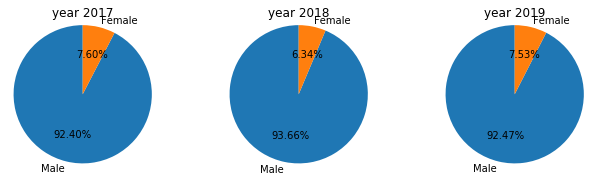

In [29]:
g_2017 = [data_2017['Gender'].value_counts()['Male'], data_2017['Gender'].value_counts()['Female']]
g_2018 = [data_2018['Gender'].value_counts()['Male'], data_2018['Gender'].value_counts()['Female']]
g_2019 = [data_2019['Gender'].value_counts()['Man'], data_2019['Gender'].value_counts()['Woman']]
labels = 'Male', 'Female'
fig = plt.figure()
ax1 = fig.add_axes([0, 0, .5, .5], aspect=1)
ax1.pie(g_2017, labels=labels, radius = 1.2, autopct='%1.2f%%', startangle=90)
ax2 = fig.add_axes([.5, .0, .5, .5], aspect=1)
ax2.pie(g_2018, labels=labels, radius = 1.2, autopct='%1.2f%%', startangle=90)
ax3 = fig.add_axes([1.0, .0, .5, .5], aspect=1)
ax3.pie(g_2019, labels=labels, radius = 1.2, autopct='%1.2f%%', startangle=90)
ax1.set_title('year 2017')
ax2.set_title('year 2018')
ax3.set_title('year 2019')
plt.show()

## Education

The highest education degrees of the responses are listed in ratios over the entire categories. 

Findings:

(1)	The ratios for bachelor’s degree, master’s degree and Ph.D degree are consistent over the years  2017-2019. 

(2)	It can be seen that the ratio of ‘never completed any formal degree’ is slightly decreasing from year 2017 to year 2018 and to year 2019, and this fits our intuition. 

In [30]:
print('Year 2017, education distribution \n')
data_2017['FormalEducation'].value_counts()/data_2017.shape[0]

Year 2017, education distribution 



Bachelor's degree                                                   0.4205
Master's degree                                                     0.2168
Some college/university study without earning a bachelor's degree   0.1582
Secondary school                                                    0.1150
Doctoral degree                                                     0.0255
I prefer not to answer                                              0.0216
Primary/elementary school                                           0.0204
Professional degree                                                 0.0139
I never completed any formal education                              0.0083
Name: FormalEducation, dtype: float64

In [31]:
print('Year 2018, education distribution \n')
data_2018['FormalEducation'].value_counts()/data_2018.shape[0]

Year 2018, education distribution 



Bachelor’s degree (BA, BS, B.Eng., etc.)                                             0.4416
Master’s degree (MA, MS, M.Eng., MBA, etc.)                                          0.2164
Some college/university study without earning a degree                               0.1185
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)   0.0905
Associate degree                                                                     0.0300
Other doctoral degree (Ph.D, Ed.D., etc.)                                            0.0224
Primary/elementary school                                                            0.0168
Professional degree (JD, MD, etc.)                                                   0.0146
I never completed any formal education                                               0.0071
Name: FormalEducation, dtype: float64

In [32]:
print('Year 2019, education distribution \n')
data_2019['EdLevel'].value_counts()/data_2019.shape[0]

Year 2019, education distribution 



Bachelor’s degree (BA, BS, B.Eng., etc.)                                             0.4403
Master’s degree (MA, MS, M.Eng., MBA, etc.)                                          0.2202
Some college/university study without earning a degree                               0.1182
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)   0.0972
Associate degree                                                                     0.0331
Other doctoral degree (Ph.D, Ed.D., etc.)                                            0.0274
Primary/elementary school                                                            0.0160
Professional degree (JD, MD, etc.)                                                   0.0135
I never completed any formal education                                               0.0062
Name: EdLevel, dtype: float64

## Job salary 

The annual salary (in USD) distributions are plotted in the following, based on the available respondents. To best reflect reality, we remove the values that are found lower than 10,000 or higher than 800,000. We believe that giving up certain extreme values would help avoid rare cases such as miss-typed digits or wrong currency. 

Findings:

(1)	Over entire job roles, the mean annual incoming is in a range $60,000-80,000. This number, as expected, increases with time. 

(2)	Over the years, the distribution intends to shift from median towards the high end, implying the growing potential of value in the job market.   

In [33]:
lower_bound, upper_bound = 10000, 800000
def salary_data_process(data, col_name):
    convert = lambda x : float(str(x).replace(',', ''))
    s = data[~data[col_name].isnull()][col_name].apply(convert)
    s = [i for i in s if i > lower_bound and i < upper_bound]
    return s
s_2017 = salary_data_process(data_2017, 'Salary')
s_2018 = salary_data_process(data_2018, 'ConvertedSalary')
s_2019 = salary_data_process(data_2019, 'ConvertedComp')

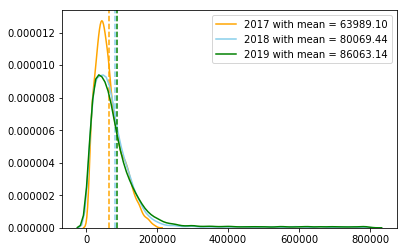

In [34]:
sns.distplot(s_2017, hist = False, color="orange", label="2017 with mean = %.2f" % np.mean(s_2017))
plt.axvline(np.mean(s_2017),color='orange', linestyle='--')
sns.distplot(s_2018, hist = False, color="skyblue", label="2018 with mean = %.2f" % np.mean(s_2018))
plt.axvline(np.mean(s_2018),color='skyblue', linestyle='--')
sns.distplot(s_2019, hist = False, color="green", label="2019 with mean = %.2f" % np.mean(s_2019))
plt.axvline(np.mean(s_2019),color='green', linestyle='--')

# Career of data scientists

## Salary comparison among careers

We focus on investigating the careers of data scientist. Assume the most recent dataset in 2019 is representative for this career analysis. In the analysis below, we pay attention to the job category “data scientists and machine learning specialists”. 

In the following, we create a new data frame with their columns representing the categories of our interest, e.g. job role or programming languages. In order to fill up the categorical table, we create dummy variables in Boolean format. We then extract texts from each user’s feedback, and categorize them into one or more categories in the corresponding column of the table. 

Findings:

(1)	Among the total 88883 respondents in 2019, there are 24 unique job roles. Out of 88883 respondents, there are 47933 respondents providing valid answers for salary column.  

(2)	The resultant table shows that “data scientist” job is ranked 6th over the entire 24 roles in terms of mean annual incoming, which looks promising. 


In [35]:
def get_dummy(data, col_name):
    data[col_name].fillna("", inplace=True)
    f = lambda x : [j for i in x for j in i]
    uniqV = set(f([row.split(';') for row in data[col_name]]))
    uniqV.remove('')
    uniqV = list(uniqV)
    dummies = pd.DataFrame(0, index=data.index, columns=uniqV)
    for dummyCol in dummies.columns:
        dummies[dummyCol] = data[col_name].map(lambda row: dummyCol in row)
    return uniqV, dummies
jobs, job_dummy = get_dummy(data_2019, 'DevType')
languages, language_dummy = get_dummy(data_2019, 'LanguageWorkedWith')

In [36]:
def get_partial_df(dummy):
    _data = data_2019[['ConvertedComp', 'Age', 'YearsCode']].join(dummy)
    _data = _data.dropna(subset=['ConvertedComp'], axis=0)
    _data = _data.drop(_data[(_data.ConvertedComp < lower_bound) | (_data.ConvertedComp > upper_bound)].index)
    return _data
_data = get_partial_df(job_dummy)

In [37]:
def relation_job_sal(_data):
    salary = [_data['ConvertedComp'][_data[i]].mean() for i in jobs]
    job_salary = pd.DataFrame({'jobs':jobs, 'annual salary':salary})
    job_salary = job_salary.sort_values(by=['annual salary'], ascending=False)
    job_salary.reset_index(inplace=True, drop=True)
    return job_salary
job_salary = relation_job_sal(_data)
print(job_salary)

    annual salary                                           jobs
0    119,595.7145                            Senior executive/VP
1    112,886.4020                            Engineering manager
2    104,534.6391                     Engineer, site reliability
3    101,157.2222                Marketing or sales professional
4     92,075.9034                              DevOps specialist
5     90,050.5945  Data scientist or machine learning specialist
6     89,230.1782                                 Engineer, data
7     88,912.0750                                Product manager
8     85,976.9594                          Developer, full-stack
9     85,735.6719    Developer, embedded applications or devices
10    85,202.2554                            Developer, back-end
11    84,726.5181                                      Scientist
12    83,944.9090                       Data or business analyst
13    83,827.6574  Developer, desktop or enterprise applications
14    83,149.1427        

## Impact of age

We monitor the impact of age on data scientist career and attempt to establish the relationship between data scientist salary and age. In the following we create a function that takes a job role of interest, an attribute parameter of interest (such as age), and step function grid (for aggregating result) as its input, and returns mean values of salary corresponding to a certain range of the parameter. 

The change of salary with age is plotted in the following. As a reference, we plot the salary of “full stack developers” in the green curve. 

It is found that for data scientists their salary increases almost linearly with the age reaching even 60 years old. For full stack developers, this increase slows down beyond the age of 47.  

In [38]:
def _for_a_job_role(_data, job_role, col_name, grid):
    def change_style(l):
        try:
            return int(l)
        except:
            pass
    d = _data[_data[job_role]][['ConvertedComp', col_name]]
    d = d.dropna(subset = [col_name], axis=0)
    d[col_name] = d[[col_name]].apply(lambda x : change_style(x), axis=1)
    d = d.groupby(pd.cut(d[col_name], grid)).mean()
    d = d.rename(columns={"ConvertedComp": "annual salary"})
    return d

In [39]:
r = np.arange(15,65,8)
ds_age = _for_a_job_role(_data, 'Data scientist or machine learning specialist', 'Age', r)
full_stack_age = _for_a_job_role(_data, 'Developer, full-stack', 'Age', r)

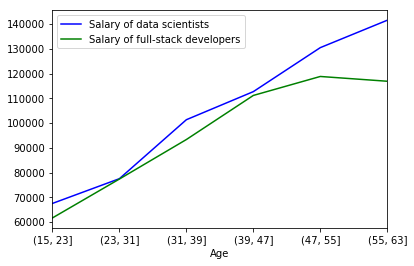

In [40]:
ax = ds_age.plot(y='annual salary', color = 'b', label = 'Salary of data scientists')
full_stack_age.plot(ax=ax, color = 'g', y='annual salary', label = 'Salary of full-stack developers')

## Impact of coding experience

Similarly, the change of salary with coding experience is plotted. 

While the salary is increasing for both data scientist and full stack developer, a surprising observation is that the salary is extremely high for ds with 35-40 years of coding experience. This might be partially due to bias from limited samples under rare cases as well as a better return from a higher educational level, which will be revealed later in the next session about education impact.

In [41]:
r = np.arange(0,50,5)
ds_codeyear = _for_a_job_role(_data,'Data scientist or machine learning specialist', 'YearsCode', r)
full_stack_codeyear = _for_a_job_role(_data,'Developer, full-stack', 'YearsCode', r)

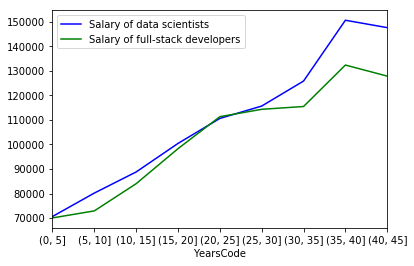

In [42]:
ax = ds_codeyear.plot(y='annual salary', color = 'b', label = 'Salary of data scientists')
full_stack_codeyear.plot(ax=ax, color = 'g', y='annual salary', label = 'Salary of full-stack developers')

## Impact of educational degrees

Connecting to last session, we seek for explaining why data scientists gain higher incoming than full stack developers, especially at an older age. We try to analyse educational aspect. 

For data scientists, we list their educational degrees (in ratios) in the following. The same is done for full stack developers. 

Findings:

(1) Interestingly, there is significant difference in terms of degree distributions, implying a strong impact from education.  

(2) Specifically, data scientists possess a higher probability of having higher degrees, e.g. master’s degree takes up 35.00% and 21.21% in data scientists and full stacks, respectively; PhD takes up 12.07% in data scientists but only 1.58% in full stacks. This finding well validates our hypothesis in earlier session.   

In [43]:
ds_edu = data_2019[job_dummy['Data scientist or machine learning specialist']]['EdLevel']
ds_edu.value_counts()/ds_edu.shape[0]

Master’s degree (MA, MS, M.Eng., MBA, etc.)                                          0.3562
Bachelor’s degree (BA, BS, B.Eng., etc.)                                             0.3500
Other doctoral degree (Ph.D, Ed.D., etc.)                                            0.1207
Some college/university study without earning a degree                               0.0652
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)   0.0520
Associate degree                                                                     0.0158
Professional degree (JD, MD, etc.)                                                   0.0115
Primary/elementary school                                                            0.0096
I never completed any formal education                                               0.0053
Name: EdLevel, dtype: float64

In [44]:
ds_edu = data_2019[job_dummy['Developer, full-stack']]['EdLevel']
ds_edu.value_counts()/ds_edu.shape[0]

Bachelor’s degree (BA, BS, B.Eng., etc.)                                             0.4895
Master’s degree (MA, MS, M.Eng., MBA, etc.)                                          0.2121
Some college/university study without earning a degree                               0.1268
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)   0.0728
Associate degree                                                                     0.0368
Other doctoral degree (Ph.D, Ed.D., etc.)                                            0.0158
Professional degree (JD, MD, etc.)                                                   0.0143
Primary/elementary school                                                            0.0079
I never completed any formal education                                               0.0054
Name: EdLevel, dtype: float64


To further validates the hypothesis that higher degree leads to higher salary. We analyse the distribution of salaries over degrees from the entire respondents. As expected, higher degree is more likely to result in a higher salary (e.g. compared to bachelors, PhDs might gain higher return in the longer run, and this explains why gaps between data scientist and full stack become higher at older age). 

In [45]:
def relation_degree_sal(data):
    degrees, degree_dummy = get_dummy(data, 'EdLevel')
    sal_degree = get_partial_df(degree_dummy)
    tmp = {}
    for i in degrees:
        tmp[i] = sal_degree[sal_degree[i]]['ConvertedComp'].mean()
    for w in sorted(tmp, key=tmp.get, reverse=True):
        print(w, tmp[w])
relation_degree_sal(data_2019)

Other doctoral degree (Ph.D, Ed.D., etc.) 113601.94522292993
Bachelor’s degree (BA, BS, B.Eng., etc.) 88280.32942581616
I never completed any formal education 88221.79545454546
Master’s degree (MA, MS, M.Eng., MBA, etc.) 86293.74675116317
Some college/university study without earning a degree 80593.93135011442
Associate degree 80213.44313967861
Primary/elementary school 77254.97916666667
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.) 72401.87612516074
Professional degree (JD, MD, etc.) 64110.00314465409


## Programming languages 

The programming languages used by data scientist are listed. It is absolute that Python dominates the entire choices. Languages like C, Java and SQL are also widely used, while R is ranked at 8th place. As expected, data scientists need to be capable of handling a combination of tasks in data engineering (SQL) and machine learning (Python).  

In [46]:
ds = language_dummy[job_dummy['Data scientist or machine learning specialist']]
ds = ds.sum().sort_values(ascending=False)
print('Number of tools mentioned by data scientists \n')
print(ds)

Number of tools mentioned by data scientists 

Python                   5125
C                        4598
Java                     4155
SQL                      3775
JavaScript               3319
HTML/CSS                 3258
Bash/Shell/PowerShell    2874
R                        2367
C++                      2066
C#                       1463
PHP                      1198
TypeScript                856
Other(s):                 682
Assembly                  623
Scala                     611
Go                        563
VBA                       490
Ruby                      426
Swift                     327
Kotlin                    304
Objective-C               254
Rust                      237
Clojure                   140
WebAssembly               121
Dart                      119
Elixir                    108
F#                        100
Erlang                     95
dtype: int64


# Conclusion

This notebook explores some insights based on StackOverflow survey in years 2017-2019, with a particular emphasis on data science job. It is found that on average data science career is ranked one of the highest salaries, and its pay intends to linearly grow with one’s working experience. A key reason is about employees’ educational degree. It is found that there are considerably more master and PhD degree holders taking data scientist career than full stack developer career. As observed from the survey, a higher degree usually leads to a higher pay on average. 

In the future, it might be very interesting to investigate individuals’ career history chronologies and derive impacts on career return temporally. For example, a question like “what is the transition rate from career of x to career of data scientist? And what is it reversely?” 